## Creating Randon Forest Model for Heart Disease Dataset

## Preprocessing

In [1]:
# Import our dependencies
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

# Read the Heart_Disease_Prediction.csv file from the Resources folder into a Pandas DataFrame
#file_path = Path("Heart_Disease_Prediction.csv") - Use for Google Colab
heart = "cleaned_train.csv"

df_heart = pd.read_csv(heart)

df_heart[0:5]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,country_of_residence_United States,country_of_residence_Viet Nam,used_app_before_no,used_app_before_yes,test_taker_?,test_taker_Health care professional,test_taker_Others,test_taker_Parent,test_taker_Relative,test_taker_Self
0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [2]:
# Split our preprocessed data into our features and target arrays
target = df_heart['Autism_Diagnosis']
features = df_heart.drop('Autism_Diagnosis', axis=1)
features_name = features.columns
features.head()

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=78)

In [3]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ROS = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_resampled, y_resampled= ROS.fit_resample(X_train_scaled, y_train)

## Fit the Random Forest Model

In [4]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=78)

In [5]:
# Import the kerastuner library
rf_model = rf_model.fit(X_resampled, y_resampled)

Making Predictions using Random Forest

In [6]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

Random Forest Evaluation

In [7]:
# Get best model hyperparameters
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [8]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,158,9
Actual 1,14,19


Accuracy Score : 0.885
Classification Report
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93       167
         1.0       0.68      0.58      0.62        33

    accuracy                           0.89       200
   macro avg       0.80      0.76      0.78       200
weighted avg       0.88      0.89      0.88       200



In [9]:
# Random Forests in sklearn automatically calculates feature importance
importances = rf_model.feature_importances_

# Sort the features by their importance
sorted(zip(rf_model.feature_importances_, features.columns), reverse=True)

[(0.13008450104880043, 'ASQ_Total_score'),
 (0.10033949967698928, 'A9_Score'),
 (0.07670069282167, 'A6_Score'),
 (0.07365972288061937, 'age'),
 (0.06571011780769816, 'A3_Score'),
 (0.06565438417724499, 'A4_Score'),
 (0.049187140098063305, 'A5_Score'),
 (0.04131732680470399, 'A10_Score'),
 (0.034005022352434966, 'ethnicity_White-European'),
 (0.02607781908587944, 'A7_Score'),
 (0.024415596533021392, 'A2_Score'),
 (0.0221309932361709, 'A1_Score'),
 (0.021882188492875092, 'austim_no'),
 (0.01895786604683192, 'austim_yes'),
 (0.01529257435186056, 'country_of_residence_United States'),
 (0.013856408052368575, 'jaundice_at_birth_no'),
 (0.013074703883402037, 'country_of_residence_Australia'),
 (0.012657167696738105, 'gender_f'),
 (0.012122933806629814, 'jaundice_at_birth_yes'),
 (0.011355715485411432, 'A8_Score'),
 (0.011132784030223027, 'gender_m'),
 (0.01106188680604988, 'ethnicity_?'),
 (0.01036532145185331, 'country_of_residence_United Kingdom'),
 (0.010305432281249806, 'country_of_resid

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

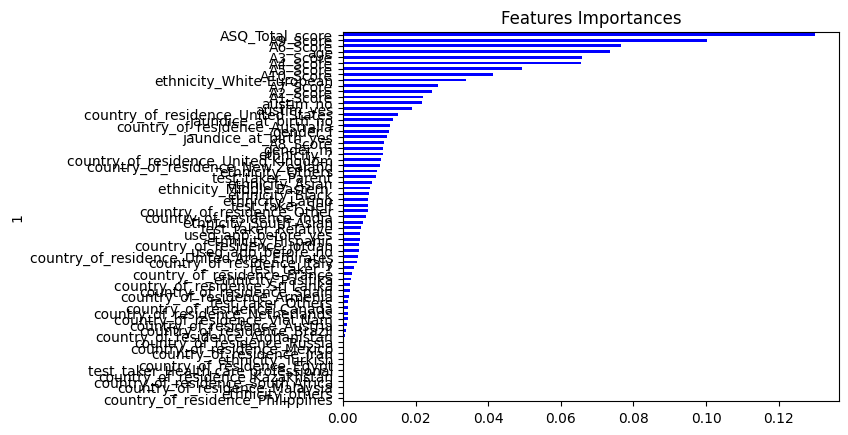

In [10]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, features.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='blue', title= 'Features Importances', legend=False)

<Axes: title={'center': 'Top 10 Feature Importances'}, ylabel='1'>

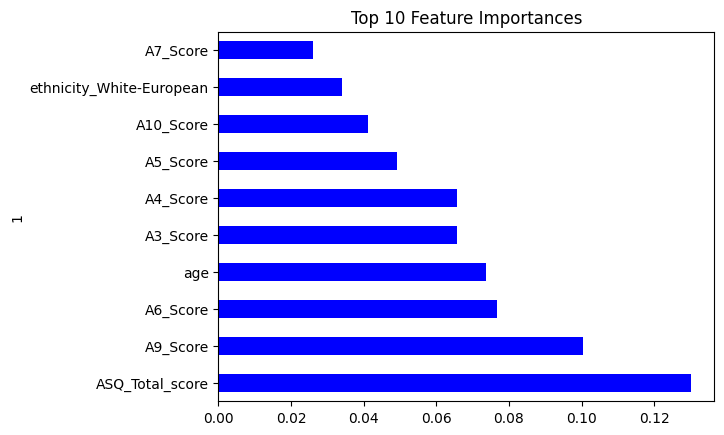

In [11]:


# Sort the feature importances in descending order
importances_sorted = importances_df.sort_values(by='Feature Importances', ascending=False)

# Select only the top 10 important features
top_10_importances = importances_sorted.head(10)

# Plot the top 10 features' importances
top_10_importances.plot(kind='barh', color='blue', title='Top 10 Feature Importances', legend=False)